In [4]:
import numpy as np
import bokeh.plotting as plt
import sklearn.manifold as manifold
import ujson
import time
from sklearn.metrics import mean_squared_error
import pickle
np.seterr(divide='ignore', invalid='ignore')
from bokeh.plotting import figure, show, output_file


def load_data():
    # Load the rating data
    rating_data = np.load('tmp/clean_rating_data.npz')
    orig_rating = rating_data['full_rating']   #
    return orig_rating  # 1540 * 200

def load_ave_rating_data():
    # Load the rating data
    rating_data = np.load('tmp/clean_rating_data.npz')
    orig_rating = rating_data['full_rating']   #
    mean = np.mean(orig_rating, axis=0)
    return mean.tolist()  # len = 200 list 


def svd_reconstruct(num_dim):
    rating = load_data()
    u, s, v = np.linalg.svd(rating, full_matrices=False)     # U.shape = [1540*200],s.shape = (200,) V.shape = 200*200
    s_diagonal = np.diag(s)

    # reduce dimensions of Rater matrix and face matrix
    user = u[:, 0:num_dim]
    face = np.dot(s_diagonal[0:num_dim, 0:num_dim], v[0:num_dim, :])  
    return user, face.T  # (1540, num_dim), (200, num_dim)


def embed_show(x, y, title):
    with open('data/imagePathFile.json') as data_file:
        img_list = ujson.load(data_file)
    
    p = plt.figure()
    p.image_url(x=x, y=y, url=img_list, w=1, h=22, anchor="center")

    p.circle(x=x, y=y)

    plt.output_file(title, title=title)
    plt.save(p)
    plt.show(p)
    return


def main_correlation_scatter():
    _, face_svd = svd_reconstruct(2)
    att_average = load_ave_rating_data()
    with open('data/imagePathFile.json') as data_file:
        image_list = ujson.load(data_file)
    embed_show(att_average, face_svd[:, 0], 'ave_att_vs_svd_dim1.html')
    embed_show(att_average, face_svd[:, 1], 'ave_att_vs_svd_dim2.html')
    return

main_correlation_scatter()
    

    

In [5]:
_, face_svd = svd_reconstruct(2)
att_average = load_ave_rating_data()

In [9]:
cov = np.corrcoef(att_average, face_svd[:,1])
cov[0, 1]

-0.97054668120246557

In [12]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
def load_data():
    # Load the rating data
    rating_data = np.load('tmp/clean_rating_data.npz')
    orig_rating = rating_data['full_rating']   #
    return orig_rating  # 1540 * 200

orig_rating = load_data()

def cal_correlation():
    orig_rating = load_data()
    att_average = load_ave_rating_data()
    
    correlation_array = []
    for i in range(orig_rating.shape[0]):
        cov = np.corrcoef(att_average, orig_rating[i, :])
        correlation_array.append(cov[0, 1])
    return correlation_array

correlation_array = cal_correlation()
    

In [15]:
correlation_array.mean()

0.72433785360271086

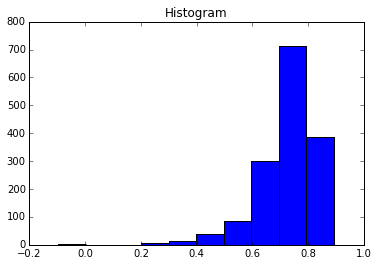

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(correlation_array)
plt.title("Histogram")

In [35]:
def cal_correlation():
    orig_rating = load_data()
    att_average = load_ave_rating_data()
    
    correlation_array = []
    for i in range(orig_rating.shape[0]):
        cov = np.corrcoef(att_average, orig_rating[i, :])
        correlation_array.append(cov[0, 1])
    return correlation_array

correlation_array = cal_correlation()
sort_ind = np.argsort(correlation_array)

In [36]:
sort_ind

array([ 263,  845, 1290, ..., 1069,  179,   79])

In [40]:
correlation_array[sort_ind[1]]

0.084091218994753719

In [41]:
sort_ind[1]

845

In [42]:
orig_rating[845,:]

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4